In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("city_temperature.csv", low_memory=False)


In [5]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9


In [6]:
print(df.Year.value_counts().index)

Int64Index([2000, 1999, 2001, 2002, 2003, 1998, 1996, 1997, 2004, 1995, 2005,
            2006, 2010, 2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020,  201,  200],
           dtype='int64')


In [7]:
print(df['Year'].value_counts()[-10:])

2013    111021
2014    109018
2015    107498
2016    107237
2017    106946
2018    106698
2019    106337
2020     38810
201        351
200         89
Name: Year, dtype: int64


In [8]:
df = df[df['Year'] > 1900]

In [9]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9


In [10]:
df.isna().sum()

Region                  0
Country                 0
State             1450550
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [11]:
df['AvgTemperature'].fillna(method='ffill', inplace=True)

In [12]:
df.isna().sum()

Region                  0
Country                 0
State             1450550
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [13]:
# convert the farenheit column to celsius
df['celsius'] = (df['AvgTemperature'] - 32) * 5/9

In [14]:
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature    celsius
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2  17.888889
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4   9.666667
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8   9.333333
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4   8.000000
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9   8.833333


In [15]:
# check the average temperatures between 1995 and 2020
print(df[['Region', 'celsius']].groupby('Region').mean().sort_values(by='celsius', ascending=False))

                                     celsius
Region                                      
Middle East                        20.213641
Asia                               16.982584
South/Central America & Carribean  16.771910
Australia/South Pacific            16.211594
North America                      12.946560
Africa                             12.011121
Europe                              8.227161


In [16]:
# check mean the temperaures in the US from 2000 to 2020
print(df[['Country', 'celsius']].groupby('Country').mean().sort_values(by='celsius', ascending=False).loc['US'])

celsius    13.401296
Name: US, dtype: float64


In [17]:
# check all the temperaures in the US from 2010 to 2020 by year
print(df[['Country', 'Year', 'celsius']].groupby(['Country', 'Year']).mean().sort_values(by='Year', ascending=True).loc['US'])

        celsius
Year           
1995  13.328247
1996  11.029378
1997  12.909167
1998  13.312202
1999  13.624287
2000  13.299654
2001  13.725167
2002  12.539930
2003  13.144707
2004  13.415551
2005  13.639401
2006  14.058971
2007  13.594201
2008  12.640921
2009  12.944540
2010  13.752832
2011  13.920310
2012  14.802415
2013  13.309528
2014  13.156373
2015  14.166674
2016  14.599853
2017  14.409875
2018  13.910648
2019  13.728261
2020   8.543475


<AxesSubplot:>

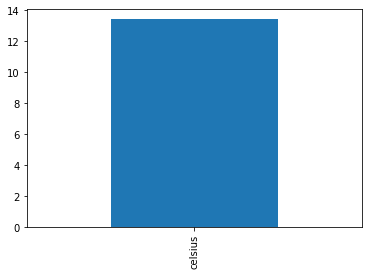

In [18]:
df[['Country', 'celsius']].groupby('Country').mean().sort_values(by='celsius', ascending=False).loc['US'].plot(kind='bar')

In [19]:
df_region = df[['Region', 'Year','celsius']].groupby(['Region', 'Year']).mean().reset_index()
print(df_region.head())

   Region  Year    celsius
0  Africa  1995  11.653743
1  Africa  1996   9.082433
2  Africa  1997   2.934720
3  Africa  1998  -0.929403
4  Africa  1999   1.196594


In [20]:
print(df_region.tail())

                                Region  Year    celsius
177  South/Central America & Carribean  2016  21.137797
178  South/Central America & Carribean  2017  21.084982
179  South/Central America & Carribean  2018  20.803734
180  South/Central America & Carribean  2019  20.908752
181  South/Central America & Carribean  2020  22.508655


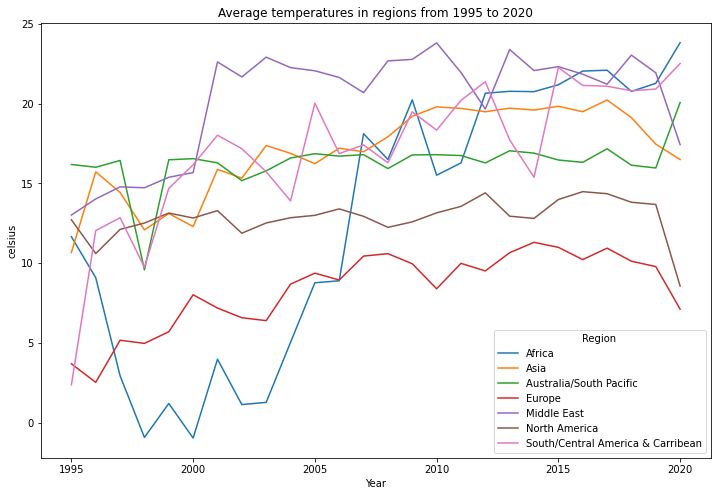

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='celsius', data=df_region, hue='Region')
plt.title('Average temperatures in regions from 1995 to 2020')
plt.show()

In [25]:
print(df[df.Year.isin([1995,2020])][['Region', 'Year', 'celsius']].groupby(['Region', 'Year']).mean().reset_index())

                               Region  Year    celsius
0                              Africa  1995  11.653743
1                              Africa  2020  23.815443
2                                Asia  1995  10.658160
3                                Asia  2020  16.492058
4             Australia/South Pacific  1995  16.181304
5             Australia/South Pacific  2020  20.063502
6                              Europe  1995   3.685819
7                              Europe  2020   7.111279
8                         Middle East  1995  13.009058
9                         Middle East  2020  17.428137
10                      North America  1995  12.713509
11                      North America  2020   8.559351
12  South/Central America & Carribean  1995   2.362771
13  South/Central America & Carribean  2020  22.508655


<AxesSubplot:xlabel='Year'>

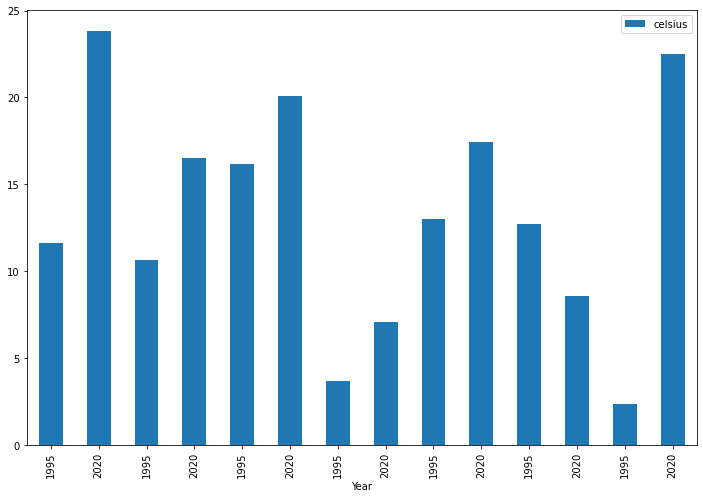

In [27]:
df[df.Year.isin([1995,2020])][['Region', 'Year', 'celsius']].groupby(['Region', 'Year']).mean().reset_index().plot(kind='bar', x='Year', y='celsius', figsize=(12,8))

In [32]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,celsius
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.888889
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.666667
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.333333
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.000000
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.833333


In [40]:
df_region


,Region,Year,celsius
0,Africa,1995,11.653743
1,Africa,1996,9.082433
2,Africa,1997,2.934720
3,Africa,1998,-0.929403
4,Africa,1999,1.196594
...,...,...,...
177,South/Central America & Carribean,2016,21.137797
178,South/Central America & Carribean,2017,21.084982
179,South/Central America & Carribean,2018,20.803734
180,South/Central America & Carribean,2019,20.908752


In [42]:
df_region2 = df[['Region', 'Month', 'celsius']].groupby(['Region', 'Month']).mean().reset_index()
print(df_region2.head())

   Region  Month    celsius
0  Africa      1  11.260276
1  Africa      2  12.076817
2  Africa      3  12.758042
3  Africa      4  12.741162
4  Africa      5  12.315568


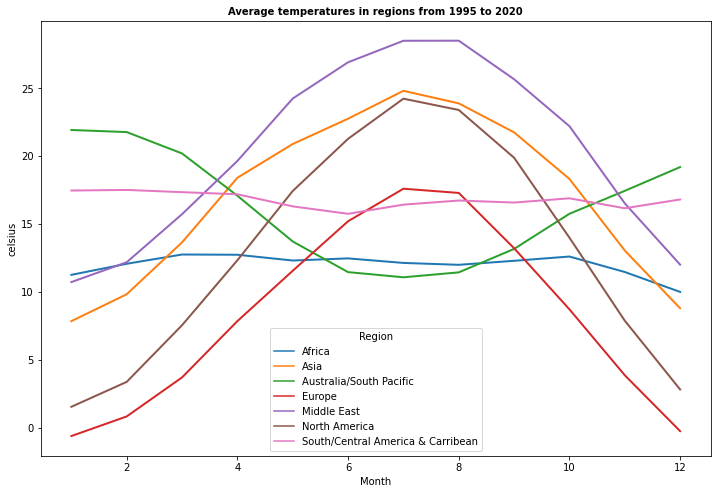

In [51]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month', y='celsius', data=df_region2, hue='Region', legend=True, palette='tab10', linewidth=2)
plt.title('Average temperatures in regions from 1995 to 2020', fontsize=10, fontweight='bold')
plt.show()

In [56]:
# hottest cities in the world
print(df[['City', 'celsius', 'Country']].groupby(['City', 'Country']).mean().sort_values(by='celsius', ascending=False).reset_index().head(10))

               City               Country    celsius
0             Dubai  United Arab Emirates  28.318128
1  Chennai (Madras)                 India  28.248345
2              Doha                 Qatar  27.908680
3         Abu Dhabi  United Arab Emirates  27.884722
4            Niamey               Nigeria  27.750899
5         Singapore             Singapore  27.585780
6            Manila           Philippines  27.523569
7   Bombay (Mumbai)                 India  27.517627
8            Manama               Bahrain  27.019774
9         Vientiane                  Laos  26.648590


In [58]:
# coldest cities in the world
print(df[['City', 'celsius', 'Country']].groupby(['City', 'Country']).mean().sort_values(by='celsius', ascending=False).reset_index().tail(10))

            City        Country    celsius
311        Dhaka     Bangladesh -12.161178
312  Guadalajara         Mexico -16.138811
313       Bissau  Guinea-Bissau -16.448821
314     Freetown   Sierra Leone -23.233478
315      Hamburg        Germany -24.071662
316    Frankfurt        Germany -25.371548
317     Lilongwe         Malawi -29.214191
318   Georgetown         Guyana -30.056400
319         Bonn        Germany -43.815583
320    Bujumbura        Burundi -54.109521


<AxesSubplot:xlabel='City'>

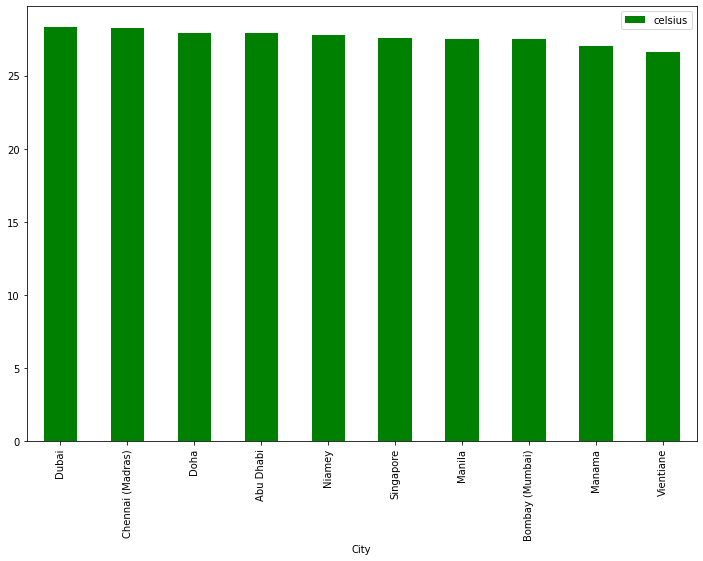

In [68]:
df[['City', 'celsius', 'Country']].groupby(['City', 'Country']).mean().sort_values(by='celsius', ascending=False).reset_index().head(10).plot(kind='bar', x='City', y='celsius', color="g", figsize=(12,8), rot=90)

In [69]:
df.info

<bound method DataFrame.info of                 Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico

In [70]:
df_region.info

<bound method DataFrame.info of                                 Region  Year    celsius
0                               Africa  1995  11.653743
1                               Africa  1996   9.082433
2                               Africa  1997   2.934720
3                               Africa  1998  -0.929403
4                               Africa  1999   1.196594
..                                 ...   ...        ...
177  South/Central America & Carribean  2016  21.137797
178  South/Central America & Carribean  2017  21.084982
179  South/Central America & Carribean  2018  20.803734
180  South/Central America & Carribean  2019  20.908752
181  South/Central America & Carribean  2020  22.508655

[182 rows x 3 columns]>

In [71]:
df_region2.info

<bound method DataFrame.info of                                Region  Month    celsius
0                              Africa      1  11.260276
1                              Africa      2  12.076817
2                              Africa      3  12.758042
3                              Africa      4  12.741162
4                              Africa      5  12.315568
..                                ...    ...        ...
79  South/Central America & Carribean      8  16.733952
80  South/Central America & Carribean      9  16.584116
81  South/Central America & Carribean     10  16.896248
82  South/Central America & Carribean     11  16.164449
83  South/Central America & Carribean     12  16.811432

[84 rows x 3 columns]>